# Exercise 3

In this exercise, you will simulate an experiment designed to measure the lifetime of an unstable particle X.  A beam of X particles is produced with a known average momentum and injected into a vacuum chamber.  Each X particle will travel some distance into the chamber before decaying at the "decay vertex", $\textbf{r}_{vtx}$.  The charged daughter particle is then detected by four tracking stations, located at various distances ($z_{stn}$) along the beam line.  Each tracking station measures the position where the track hits the station, $\textbf{r}_{hit}$.

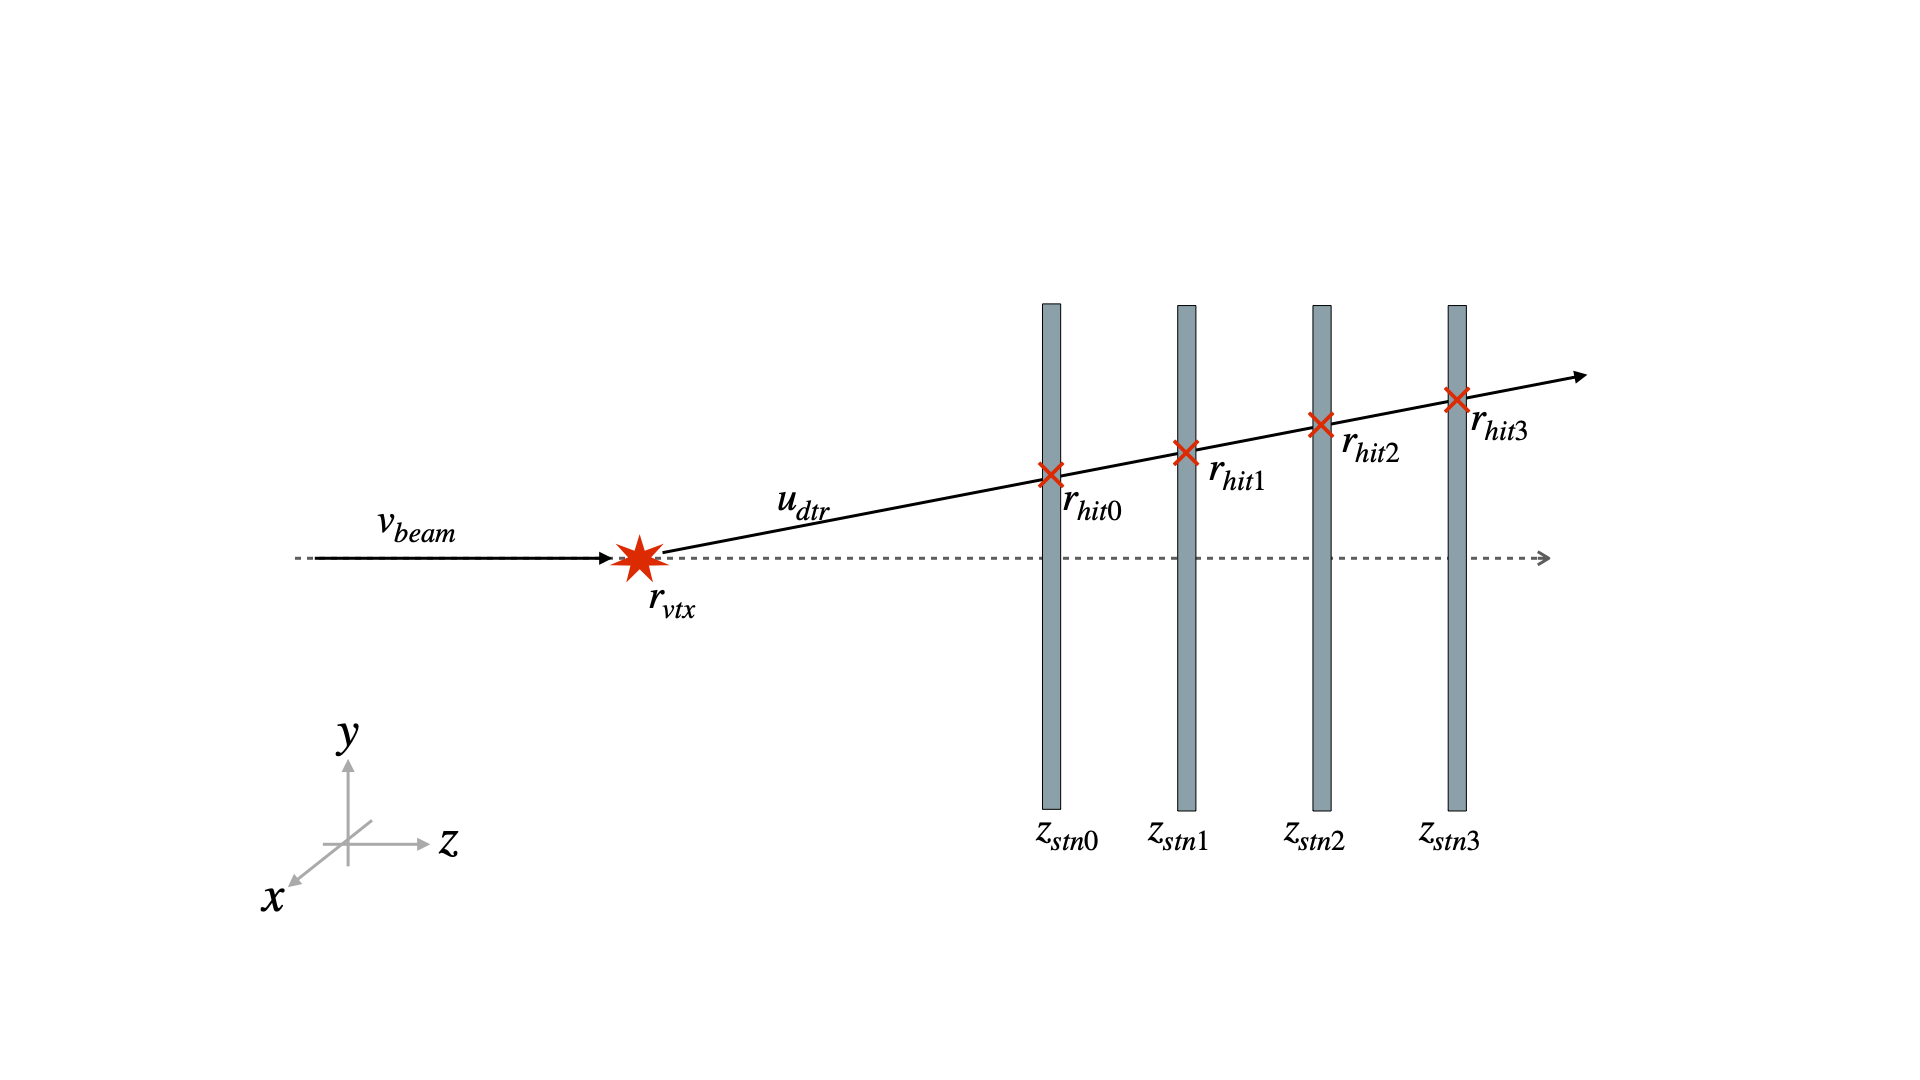

The coordinate system used is shown in the diagram, where the beam is produced at the origin and the average beam momentum is in the $z$-direction.

You will simulate the production and decay of particle X, as well as detection of its daughter particle. Each part of the exercise below deals with a different part of the experiment, for which you will generate random numbers with a specified distribution.  You will then verify the desired distribution is indeed produced - here a qualitative assessment is adequate, but a quantitative one is preferrable.

Use of simulation allows you to study the impact of different experimental choices, and your code should be capable of running with an arbitrary set of parameters. However, you can assume the initial set of parameters below : 
   * X mean lifetime, $\tau = 2.5 {\rm ms}$
   * Mean X velocity, $\mu_v = 2000 {\rm ms}^{-1}$
   * Std dev X velocity, $\sigma_v = 50 {\rm ms}^{-1}$
   * Tracking station positions, $z_{stn} = 30, 35, 40, 45 {\rm m}$
   * Tracking hit resolution, $\sigma_{rx, ry} = 0.01 {\rm m}$

It is strongly recommended that you use 3D vectors throughout the exercises, using numpy arrays, and numpy functions for vector algebra.

**Extensions**

A variety of extensions are possible to this exercise, drawing on some of the topics already covered in the unit. A few ideas are given below.  Please discuss any extension with the unit director before starting work.
   * Reconstructing the vertex location from the hit positions
   * Extracting the lifetime of the X particle from reconstructed vertex positions
   * Optimal placement of tracking stations


**Remember**
   * You are expected to use numpy and scipy libraries where appropriate.  
   * You should run each cell in order from the top of the notebook; there is no need to repeat code between cells
   * Use the "refresh kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it

## Part 1 - Beam Generation

First, you should simulate the production of X particles in the beam.  Each particle in the beam will have a velocity in the z-direction, that is drawn from a normal distribution with mean $\mu_{pz}$ and standard deviation $\sigma_{pz}$.  The particle should decay after a time that is drawn from an exponential distribution with mean lifetime $\tau$.  Given the velocity and the decay time, the decay position in the lab frame can then be calculated.  You can assume the beam is non-relativistic.

In the cell below, write functions to simulate the beam velocity, the decay time, and the decay vertex.

In [1]:
import numpy as np #importing numpy library to handle arrays 


def beam_velocity(beamVelocityZ, stdDevBeamVel_z, num_particles):
    
    """
    Function simulates the beam velocity for a given number of particles
    
    Parameters:
    beamVelocityZ (float): The mean value of the beam velocity in the z-direction. (m/s)
    stdDevBeamVel_z (float): The standard deviation of the beam velocity in the z-direction. (m/s)
    num_particles (int): The number of particles for which to simulate the beam velocity.

    Returns:
    Numpy array of shape (num_particles, 3) containing the beam velocity in x, y, and z directions. (m/s)
    """
    vz = np.random.normal(beamVelocityZ, stdDevBeamVel_z, num_particles)
    return np.stack((np.zeros(num_particles), np.zeros(num_particles), vz), axis=1)



# function to simulate the decay time
def decay_time(tau, num_particles):
    """
    Function simulates the decay time for a given number of particles
    Parameters:
    tau (float): Mean decay time. (s)
    num_particles (int): The number of particles for which to simulate the decay time.

    Returns:
    A numpy array of shape (num_particles,) containing the simulated decay times.
    """
    return np.random.exponential(tau, num_particles)

# function to simulate the decay vertex
def decay_vertex(v, t):
    """Parameters:
    Function simulates the decay vertex for a given number of particles
    v: A numpy array of shape (3,) representing the velocity vector of the particle.
    t: A numpy array of shape (num_particles,) representing the decay time for each particle.

    Returns:
    A numpy array of shape (num_particles, 3) representing the decay vertex of each particle in x, y, and z directions.
    """
    rvt = v*t[:, np.newaxis]  # position at decay time in the lab frame
    
    return np.stack((np.zeros_like(rvt[:, 0]), np.zeros_like(rvt[:, 1]), rvt[:, 2]), axis=1)


R-squared value: 1.00
Is the distribution Gaussian? True


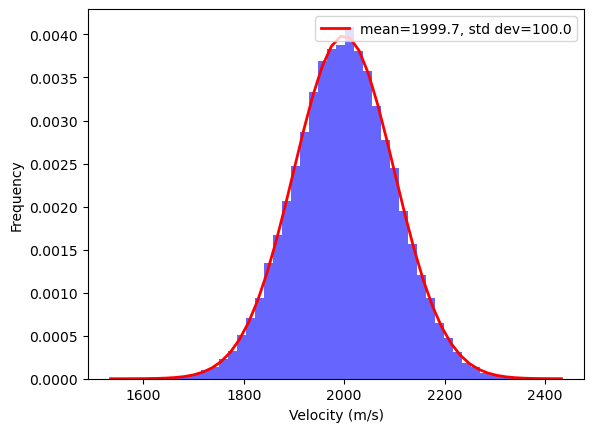

In [2]:
import matplotlib.pyplot as plt #importing package to visualise data
from scipy.stats import norm #importing package to fit a guassian curve to the plot

meanbeamVelocityZ = 2000  # mean beam velocity in z-direction (m/s)
stdDevBeamVelocityZ = 100  # standard deviation of beam velocity in z-direction (m/s)
tau = 2.5e-3  # mean lifetime of particles (s)
z_stn = [30, 35, 40, 45]  # positions of the tracking stations (m)
num_particles = 100000  # number of X particles to simulate

#calling functions
v = beam_velocity(meanbeamVelocityZ, stdDevBeamVelocityZ, num_particles) #velocity array for a number of particles
t = decay_time(tau, num_particles) #decay time array for number of praticles
r = decay_vertex(v, t) #array of position of the decay vertex for number of particles

# Plotting histogram
counts, bins, _ = plt.hist(v[:, 2], bins=50, density=True, alpha=0.6, color='blue')
x = np.linspace(bins[0], bins[-1], 50)

# Fitting and plotting a gaussian curve to the histogram data
mu, std = norm.fit(v[:, 2])
p = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, p, 'r-', linewidth=2,
         label=f'mean={mu:.1f}, std dev={std:.1f}')

plt.xlabel('Velocity (m/s)')
plt.ylabel('Frequency')
plt.legend()

#Calculating R-squared value
SS_res = np.sum((counts - p)**2)
SS_tot = np.sum((counts - np.mean(counts))**2)
R_squared = 1 - SS_res / SS_tot
print(f'R-squared value: {R_squared:.2f}')

print(f'Is the distribution Gaussian? {R_squared > 0.9}')

plt.show()
    



In the next cell, test your functions, and verify that they have the desired distributions.

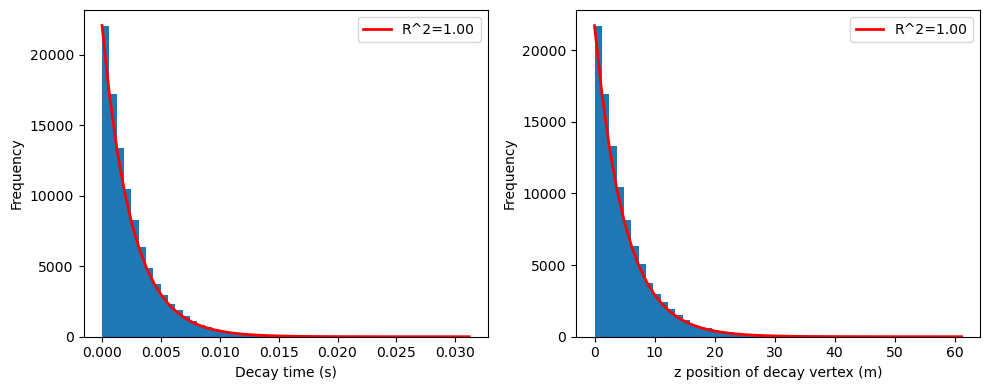

Does the distribution for decay time show exponential decay? True

Does the distribution for position of the decay vertex show exponential decay? True


In [3]:
from scipy.optimize import curve_fit

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
counts, bins, _ = axs[0].hist(t, bins=50)
x = np.linspace(bins[0], bins[-1], 50)

# Exponential function to fit the curve
def exponential(x, A, t_au, B):
    return A * np.exp(-x / t_au) + B

p0 = [np.max(counts), np.mean(t), np.min(counts)]
popt, pcov = curve_fit(exponential, bins[:-1], counts, p0=p0)

# Generate exponential curve using fitted parameters
A, t_au, B = popt
p = exponential(x, A, t_au, B)

# Calculate R-squared values
residuals = counts - exponential(bins[:-1], *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((counts - np.mean(counts))**2)
r_squared = 1 - (ss_res / ss_tot)

# Plot fitted exponential curve
axs[0].plot(x, p, 'r-', linewidth=2,
              label=f'R^2={r_squared:.2f}')

# Set axis labels and legend
axs[0].set_xlabel('Decay time (s)')
axs[0].set_ylabel('Frequency')
axs[0].legend()

counts, bins, _ = axs[1].hist(r[:, 2], bins=50)
x = np.linspace(bins[0], bins[-1], 50)

# Fit the exponential to histogram data
p0 = [np.max(counts), np.mean(r[:, 2]), np.min(counts)]
popt, pcov = curve_fit(exponential, bins[:-1], counts, p0=p0)

# creating an exponential curve using fitted parameters
A, t_au, B = popt
p = exponential(x, A, t_au, B)

# Calculate R-squared values
residuals = counts - exponential(bins[:-1], *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((counts - np.mean(counts))**2)
r_squared = 1 - (ss_res / ss_tot)

axs[1].plot(x, p, 'r-', linewidth=2,
             label=f'R^2={r_squared:.2f}')

# Set axis labels and legend
axs[1].set_xlabel('z position of decay vertex (m)')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.tight_layout()
plt.show()


print(f'Does the distribution for decay time show exponential decay? {r_squared > 0.9}\n')


print(f'Does the distribution for position of the decay vertex show exponential decay? {r_squared > 0.9}')



## Part 2 - Daughter Particle

Now simulate the direction of the decay product, which should be _isotropic_ in the rest frame of the beam particle. This is the same as generating points on the surface of a unit sphere, with uniform probability over the solid angle $d\Omega$. This can be achieved in spherical coordinates, by generating the two angles, $\phi$ and $\theta$.  These should not have uniform distributions, since the area element is given by :

$${\rm d}\Omega = \sin(\theta) {\rm d}\phi {\rm d}\theta$$

To obtain uniform probability over the sphere, you should generate $\phi$ with a uniform distribution between $0$ and $2\pi$, and $\theta$ with a distribution proportional to $\sin \theta$.

**Notes**
   * we will assume the direction in the lab frame is equivalent to the direction in the beam particle rest frame. This is a valid approximation, provided the daughter particle has much higher momentum than the beam particle.
   * we will assume the daughter moves in a straight line, which means we do not need to compute its momentum, ie. the direction vector is a unit vector.

In [4]:
def decay_direction(num_points):
    """
    Generates directional vectors.
    
    Parameters:
    num_points: Number of particles, 1 vector generated for each particle.

    
    Returns:
        A numpy array (num_points, 3): each row represents a directional vector
        with x, y, and z components. The magnitude of each vector is 1.

    """
    phi = np.random.uniform(0, 2*np.pi, num_points)
    theta = np.arccos(np.random.uniform(-1,1,size=num_points))
    
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    
    return np.column_stack((x, y, z))


points = decay_direction(num_particles)
theta = np.arccos(points[:, 2])
phi = np.arctan2(points[:, 1], points[:, 0])


As for Part 1, in the next cell, test your functions and verify the desired distributions are produced.

By inspecting the plots Unit Vec from different angles you can observe that decay occurs in a uniform distribution



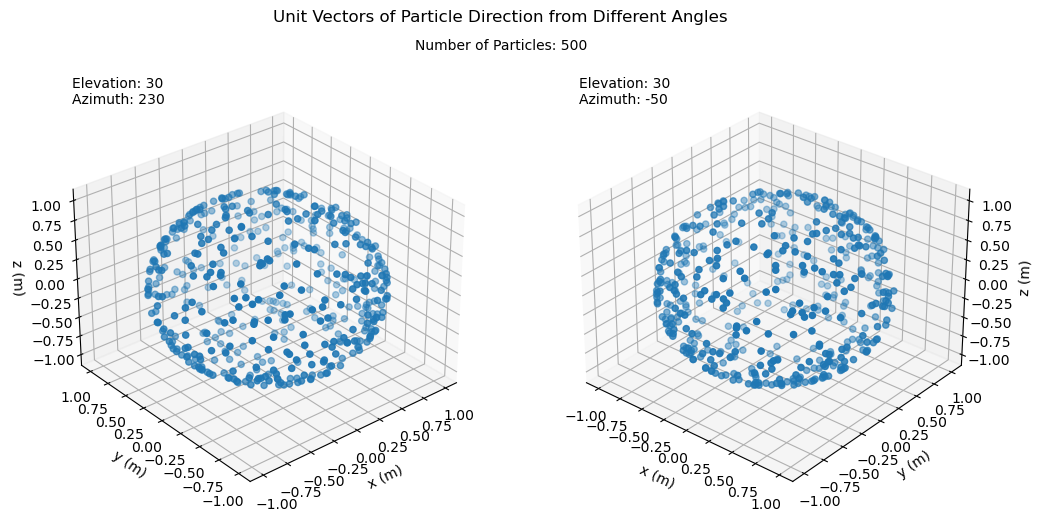

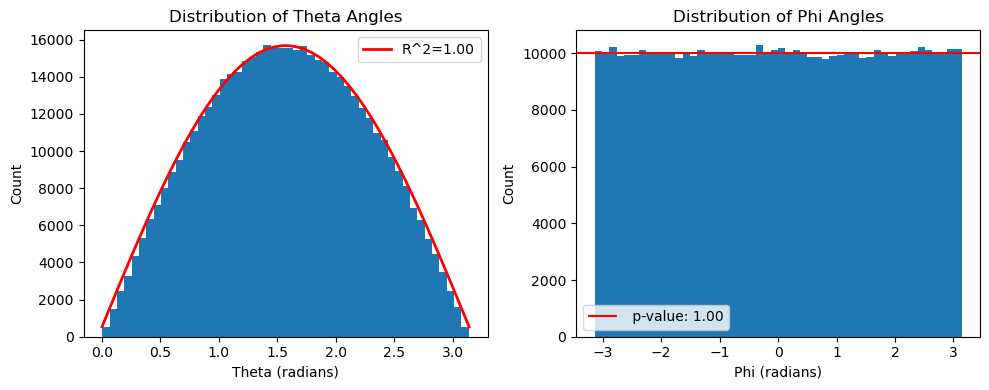

In [5]:
from mpl_toolkits import mplot3d #importing a library to support plotting in 3d
from scipy.stats import chisquare #importing library to obtain p-value

num_points = 500

# Scatter plot of unit vectors

print("By inspecting the plots Unit Vec from different angles you can observe that decay occurs in a uniform distribution\n")

fig, axs = plt.subplots(1, 2, figsize=(12, 8), subplot_kw={'projection': '3d'})

# create the first subplot
axs[0].scatter3D(*decay_direction(num_points).T)
axs[0].set_xlabel('x (m)')
axs[0].set_ylabel('y (m)')
axs[0].set_zlabel('z (m)')
axs[0].view_init(elev=30, azim=230)
axs[0].text2D(0.05, 0.95, f"Elevation: {axs[0].elev}\nAzimuth: {axs[0].azim}", transform=axs[0].transAxes)

# fig.subplots_adjust(wspace=0.5)

# create the second subplot
axs[1].scatter3D(*decay_direction(num_points).T)
axs[1].set_xlabel('x (m)')
axs[1].set_ylabel('y (m)')
axs[1].set_zlabel('z (m)')
axs[1].view_init(elev=30, azim=-50)
axs[1].text2D(0.05, 0.95, f"Elevation: {axs[1].elev}\nAzimuth: {axs[1].azim}", transform=axs[1].transAxes)

fig.suptitle('Unit Vectors of Particle Direction from Different Angles', y = 0.85)
plt.figtext(0.5, 0.8, f'Number of Particles: {num_points}', ha='center')
plt.show()


# obtaining distribution of points at theta and phi angles
num_points = 500000
points = decay_direction(num_points)
theta = np.arccos(points[:, 2])
phi = np.arctan2(points[:, 1], points[:, 0])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

#histogram of theta angles to verify a sin like distribition from 0 - pi is obtained
y, bins, _ = axs[0].hist(theta, bins=50)
x = np.linspace(0, np.pi, 50)
p0 = [np.max(y), 1, 0]
popt, _ = curve_fit(lambda x, A, B, C: A*np.sin(B*x + C), x, y, p0=p0)
A, B, C = popt
y_fit = A * np.sin(B * x + C)
r_squared = 1 - np.sum((y - y_fit)**2) / np.sum((y - np.mean(y))**2)
axs[0].plot(x, y_fit, 'r-', linewidth=2, label=f'R^2={r_squared:.2f}')
axs[0].set_xlabel('Theta (radians)')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of Theta Angles')
axs[0].legend()

#histogram of phi angles to verify a uniform distribition is obtained
count, bins, _ = axs[1].hist(phi, bins=50)
observed = count / np.sum(count)
expected = np.ones(50) / 50
_, p = chisquare(observed, expected)
axs[1].set_xlabel('Phi (radians)')
axs[1].set_ylabel('Count')
axs[1].set_title('Distribution of Phi Angles')
axs[1].axhline(y=np.mean(count), color='r', label=f' p-value: {p:.2f}')
axs[1].legend()
fig.subplots_adjust(top=1.2)

plt.tight_layout()
plt.show()



## Part 3 - Propagation to Tracking Stations

The next step is to propagate the daughter particle to the tracking detectors. We can assume the particle takes a straight line path from the decay vertex. Since the tracking stations are at fixed values of $z$, the propagation is most easily performed by writing the path as two functions, giving the $x$ and $y$ coordinates as function of $z$ :

$$x(z) = m_x z + c_x$$
$$y(z) = m_y z + c_y$$

The gradients $m_x = \frac{dx}{dz}$ and $m_y = \frac{dy}{dz}$ can be computed directly from the components of the the daughter particle direction vector, $\textbf{u}_{dtr}$.

The intercepts $c_x$ and $c_y$, can then be found by solving the straight line equations given the $(x,y,z)$ coordinates of the decay vertex, $\textbf{r}_{vtx}$.

In [6]:
def forward_dirn(dec_direction, n_part):
    """Returns the indices of particles that are traveling in the forward direction.
    The function considers particles to be traveling in the forward direction if their z-component is positive or zero.

    Args:
    dec_direction (ndarray): A 2D array containing the direction vectors of particles. The first dimension corresponds to different particles, and the second dimension corresponds to the x, y, and z components of the direction vector.
    n_part (int): The number of particles to consider.

    Returns:
    ndarray: A 1D array containing the indices of particles that are traveling in the forward direction. The indices correspond to the rows of the `dec_direction` array.

"""
    I = np.where(dec_direction[:, 2] >= 0)[0]
    valid_indices = np.arange(n_part)
    valid_indices = valid_indices[valid_indices < dec_direction.shape[0]]
    I = np.intersect1d(I, valid_indices)
    return I

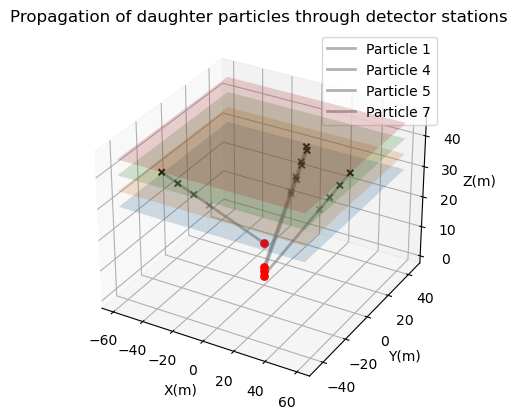

In [7]:
def propagate_daughter(r_vtx12, u_dtr12, z_stn) -> tuple:
    """
    Calculates the propagation of the decay daughters from the decay vertex to the detector stations.

    Parameters:
    r_vtx12 (np.ndarray): Array of shape (n_particles, 3) containing the x, y, and z positions of the decay vertex for each particle.
    u_dtr12 (np.ndarray): Array of shape (n_particles, 3) containing the x, y, and z components of the decay direction for each particle.
    z_stn (np.ndarray): Array containing the z positions of the detector stations.

    Returns:
    A tuple of two arrays. 
    The first array (propegation) contains the x, y, and z coordinates of the decay daughters at each point
    The second array (station_hit) contains the x, y, and z coordinates of the detector stations that the particles hit.
    """
    propegation = []
    station_hit = np.zeros((len(z_stn), len(r_vtx12), 3))
    for j in range(len(r_vtx12)):
        r_vtx = r_vtx12[j]
        u_dtr = u_dtr12[j]

        # Calculating the slope and intercept of the decay direction
        m_x = u_dtr[0] / u_dtr[2]
        m_y = u_dtr[1] / u_dtr[2]

        c_x = r_vtx[0] - r_vtx[2] * m_x
        c_y = r_vtx[1] - r_vtx[2] * m_y

        # Calculating the x, y, and z coordinates of the decay daughters at each point in the propagation
        z_arr = np.arange(r_vtx[2], z_stn[-1], 0.1)
        x_arr = m_x * (z_arr - r_vtx[2]) + r_vtx[0]
        y_arr = m_y * (z_arr - r_vtx[2]) + r_vtx[1]

        # Calculating the x, y, and z coordinates of the detector stations that the particles hit
        for i, z in enumerate(z_stn):
            x = c_x + m_x * z
            y = c_y + m_y * z
            station_hit[i,j,0] = x
            station_hit[i,j,1] = y
            station_hit[i,j,2] = z
        
        propegation.append(np.vstack((x_arr, y_arr, z_arr)).T)
        
    return propegation, station_hit



detector_radius = 2 #radius of circular detector (m)
num_particles = 7 #number of particles
u_dtr = decay_direction(num_particles) # function that generates the decay direction for each particle
I = forward_dirn(u_dtr, num_particles) # function obtaines the indicies of foward moving particles
v = beam_velocity(meanbeamVelocityZ, stdDevBeamVelocityZ, num_particles) # calling function to generate  beam velocity
t = decay_time(tau,num_particles) # function that generates the particle's decay time
# function that generates the particle's decay vertex, this is indexed with I to filter out particles moving with a velocity of negative z
r_vtx = decay_vertex(v, t)[I] 

#calling function to obtain propagation arrays and station hit coordinates of particles with a velocity in positive z direction
propegation, station_hit = propagate_daughter(r_vtx, u_dtr[I], z_stn) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, xyz in enumerate(propegation):

#x,y,z coordinates of the propegation
    x_prop = xyz[:,0]
    y_prop = xyz[:,1]
    z_prop = xyz[:,2]
    
    #plotting the decay verticies
    ax.scatter(r_vtx[i, 0], r_vtx[i, 1], r_vtx[i, 2], color='red', s=28,marker='o')
    #plotting the propegation lines
    ax.plot(x_prop, y_prop, z_prop, color='gray', alpha=0.6, linewidth=2,label=f'Particle {I[i]+1}')

#plotting the station hits
for i in range(station_hit.shape[1]):
    x_hit = station_hit[:,i,0]
    y_hit = station_hit[:,i,1]
    z_hit = station_hit[:,i,2]
    ax.scatter(x_hit, y_hit, z_hit, marker='x',c='k')
    
#creating limits based on max values of station_hit
x_lim = np.max(np.abs(station_hit[:,:,0]))
y_lim = np.max(np.abs(station_hit[:,:,1]))
z_lim = np.max(z_stn)

#creating arrays for surface plot
x = np.linspace(-x_lim, x_lim, 100)
y = np.linspace(-y_lim, y_lim, 100)
X, Y = np.meshgrid(x, y)  

#plotting detector surfaaces
for z in z_stn:
    Z = z*np.ones_like(X)
    ax.plot_surface(X, Y, Z, alpha=0.2) 
    
#labeling axes
ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')
ax.set_zlabel('Z(m)')
ax.legend()

plt.title('Propagation of daughter particles through detector stations')
plt.show()



In [8]:
def detector_size(station_hits, z_stn, r_vtx):
    """
    Function filterss out the station hits which are outside of the detector radius
    Parameters:
    station_hits : Numpy array (len(z_stn), len(r_vtx), 3) containing the x, y, and z coordinates (meters)\
    of the detector stations that the particles hit.
    z_stn : Array containing the z positions of the detector stations (meters).
    detector_radius (float) : the radius of the detector in meters.

    Returns:
    stat_hits_filtered: a list of numpy of arrays where each array contains the x, y, and z coordinates\ 
    of the detector hits for a specific detector station.
    """
    detector_radius = 2.0
    stat_hits_filtered = []

    for i in range(len(z_stn)): # iterate over z_stn
        z = z_stn[i]
        hits_filtered = []
        for j in range(station_hits.shape[1]): # iterate over rows in current subarray
            x, y, z_hit = station_hits[i, j]
            if np.sqrt(x**2 + y**2) <= detector_radius and abs(z_hit - z) <= 0.1:
                hits_filtered.append([x, y, z_hit])

        if len(hits_filtered) > 0:
            stat_hits_filtered.append(np.vstack(hits_filtered))

    return stat_hits_filtered

def index_filter(station_hits, z_stn, detector_radius):
    """
    Function filters out the station hits which are outside of the detector radius
    Parameters:
    station_hits : Numpy array (len(z_stn), len(r_vtx), 3) containing the x, y, and z coordinates (meters)\
    of the detector stations that the particles hit.
    z_stn : Array containing the z positions of the detector stations (meters).
    detector_radius (float) : the radius of the detector in meters.

    Returns:
    Indicies of station_hits which hit the detector
    """
    detector_radius = 2.0
    index = []
    for i in range(len(z_stn)): # iterate over z_stn
        z = z_stn[i]
        for j in range(station_hits.shape[1]): # iterate over rows in current subarray
            x, y, z_hit = station_hits[i, j]
            if np.sqrt(x**2 + y**2) <= detector_radius and abs(z_hit - z) <= 0.1:
                index.append(j)
    return index

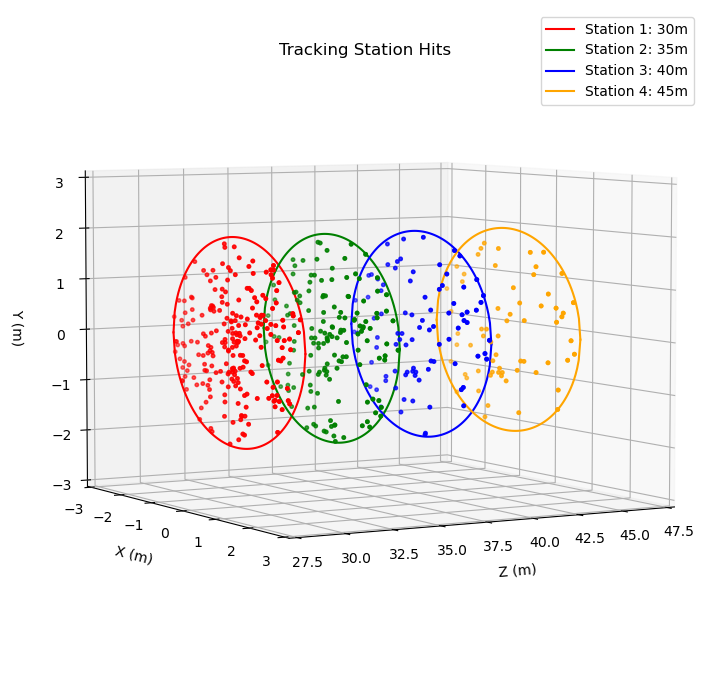

In [9]:
from mpl_toolkits.mplot3d import Axes3D 
import math

#list of colours to plot one for each detector
colors = ['r', 'g', 'b', 'orange']     

detector_radius = 2 #radius of circular detector (m)
num_particles = 80000 #number of particles
u_dtr = decay_direction(num_particles) # function that generates the decay direction for each particle
I = forward_dirn(u_dtr, num_particles) # function that calculates the particle's forward direction index
v = beam_velocity(meanbeamVelocityZ, stdDevBeamVelocityZ, num_particles) # calling function to generate  beam velocity
t = decay_time(tau,num_particles) # function that generates the particle's decay time
r_vtx = decay_vertex(v, t)[I] # function that generates the particle's decay vertex

#calling function to obtain propagation arrays and station hit coordinates
propegation, station_hit = propagate_daughter(r_vtx, u_dtr[I], z_stn) 

#calling function to obtain propagation arrays and filtered station hit coordinates for a detector radius of 2 meters
station_hit_filtered = detector_size(station_hit, z_stn, r_vtx)



fig = plt.figure(figsize=(100, 7))

# Plotting station hits
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_xlabel('Z (m)', labelpad=10)
ax1.set_ylabel('X (m)', labelpad=10)
ax1.set_zlabel('Y (m)', labelpad=10)
ax1.set_title('Tracking Station Hits', y = 1)
ax1.view_init(5, 60)

for i in range(len(station_hit_filtered)):
    x, y, z = zip(*station_hit_filtered[i])
    ax1.scatter(z, x, y, s=6, c=colors[i])

detector_radius = 2.0

# Plotting detector stations
for i, z_stn_i in enumerate(z_stn):
    x = np.linspace(-detector_radius, detector_radius, 100)
    y = np.sqrt(detector_radius**2 - x**2)
    ax1.plot([z_stn_i]*100, x, y, c=colors[i], label=f'Station {i+1}: {z_stn[i]}m')
    ax1.plot([z_stn_i]*100, x, -y, c=colors[i])
    x, y, z = zip(*station_hit_filtered[i])
    ax1.scatter(z, x, y, s=6, c=colors[i])


    ax1.legend(loc='upper right')

z_stn_change = (z_stn[1] - z_stn[0]) / 2
ax1.set_xlim(z_stn[3] + z_stn_change, z_stn[0] - z_stn_change)
ax1.set_ylim(-3, 3)
ax1.set_zlim(-3, 3)

plt.tight_layout()
plt.show()

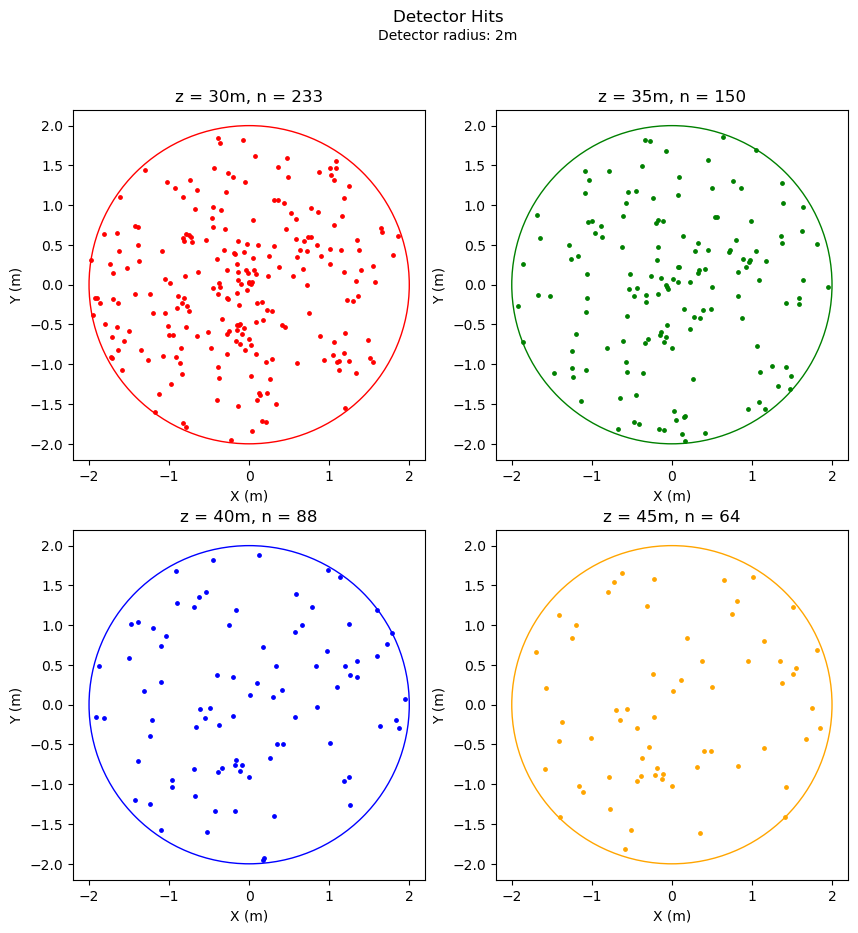

In [10]:
from matplotlib import patches #importing library to plot circle
# Set the detector radius to 2

detector_radius = 2

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Loop over each station and plot the data
for i in range(len(station_hit_filtered)):
    x, y, z = zip(*station_hit_filtered[i])
    ax = axes[i // 2, i % 2]
    num_points = len(x)
    ax.scatter(x, y, s=6, c=colors[i])
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_title(f'z = {z_stn[i]}m, n = {num_points}')
    
    ax.set_xlim([-2.2, 2.2])
    ax.set_ylim([-2.2, 2.2])
    # Adding a circe corresponding to the detector - assumed to be circular 
    circle = patches.Circle((0, 0), radius=detector_radius, linewidth=1, edgecolor=colors[i], facecolor='none')
    ax.add_patch(circle)

fig.suptitle('Detector Hits')

plt.figtext(0.5, 0.95, f'Detector radius: {detector_radius}m', ha='center')

plt.show()


In the next cell, test your track propagation functions. (A qualitative assessment is acceptable here).

## Part 4 - Hit Smearing

The tracking detectors are not perfect, and will measure position with finite resolution.  This can be simulated by adding offsets (in x and y directions) to the true hit position, where the offsets are drawn from a normal distribution with a mean of zero and a standard deviation equal to the resolution of the detector.  This process is known as smearing.

You should write a function which takes the true hit positions and smears them according to the detector resolution, to produce the reconstructed (or measured) hit positions.

In [11]:
def smear_hits(true_hits_list, hit_res):
    """Function adds random Gaussian noise to the x-y coordinates of the hits in each list of true hits.
    
    Parameters: 
    true_hits_list: a list of numpy array of detector hit coordinates (m)
    hit_res: detector resolution (m)
    
    Returns:
    smeared_hits_list:  list of numpy arrays where each array contains the smeared x, y, and z coordinates \
    of the hits for a given event.
    """
    smeared_hits_list = []
    
    for true_hits in true_hits_list:
        
        num_hits = true_hits.shape[0]       
        smear_x  = np.random.normal(0, hit_res, num_hits)
        smear_y  = np.random.normal(0, hit_res, num_hits)
        
        smeared_hits = np.zeros_like(true_hits)
        smeared_hits[:, 0] = true_hits[:, 0] + smear_x
        smeared_hits[:, 1] = true_hits[:, 1] + smear_y
        smeared_hits[:, 2] = true_hits[:, 2]
        smeared_hits_list.append(smeared_hits)
        
    return smeared_hits_list

def subtract_arrays(arr1, arr2):
    """Function subtracts the elements of two lists of numpy arrays
    Parameters:
    arr1 : list, a list of numpy arrays.
    arr2 : list, a list of numpy arrays of the same shape as array_list1.
    
    Returns: a list of numpy arrays here each element is the difference of the\
    corresponding arrays in arr1 and arr2"""
    result = []
    for ar1, ar2 in zip(arr1, arr2):
        diff = ar1 - ar2
        result.append(diff)

    return result


Again, you should test your code to verify that the desire distributions are indeed produced.

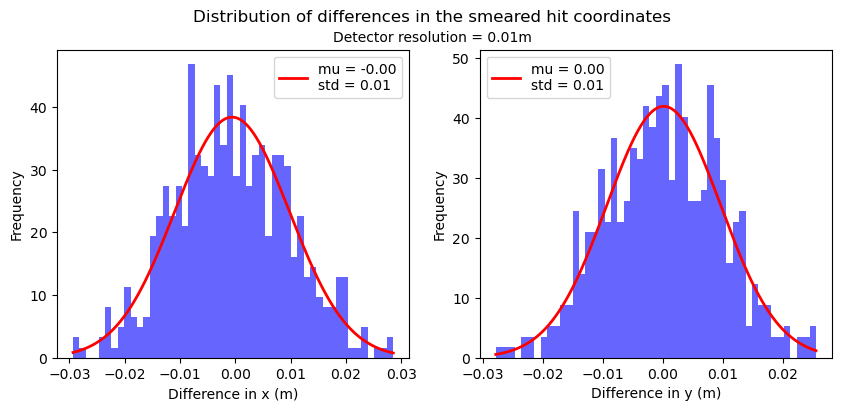

In [12]:
detector_res = 0.01
s = smear_hits(station_hit_filtered, detector_res) #calling function to obtain the coordinates of the smeared hits

#calling function to find the difference in coordinates between the smeared hits and the station hits
difference = subtract_arrays(s, station_hit_filtered)
difference_flat = np.vstack(difference)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot guassian distribution for the x coordinate
data, bins, _ = ax1.hist(difference_flat[:, 0], bins=50, density=True, alpha=0.6, color='blue')
mu, std = norm.fit(difference_flat[:, 0])
x = np.linspace(min(bins), np.max(bins), 1000)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'r-', linewidth=2, label=f"mu = {mu:.2f}\nstd = {std:.2f}")
ax1.set_xlabel("Difference in x (m)")
ax1.set_ylabel("Frequency")
ax1.legend()

# Plot guassian distribution for the y coordinate
data, bins, _ = ax2.hist(difference_flat[:, 1], bins=50, density=True, alpha=0.6, color='blue')
mu, std = norm.fit(difference_flat[:, 1])
x = np.linspace(min(bins), np.max(bins), 1000)
p = norm.pdf(x, mu, std)
ax2.plot(x, p, 'r-', linewidth=2, label=f"mu = {mu:.2f}\nstd = {std:.2f}")
ax2.set_xlabel("Difference in y (m)")
ax2.set_ylabel("Frequency")
ax2.legend()
plt.suptitle("Distribution of differences in the smeared hit coordinates")
plt.figtext(0.5, 0.9, f'Detector resolution = 0.01m', ha='center')

plt.show()

## Part 5 - Experiment Simulation

Now you are ready to simulate the full experiment.  You should produce a large sample of events.  For each event, generate a beam particle, a daughter particle, and finally the true and smeared hits.

Given a sample of events, it is possible to compute a range of parameter distributions that will inform the design of the experiment.  You should present at least the following distributions :
   * The number of hit tracking stations
   * The 2D (x,y) distribution of measured hits on each of the four stations

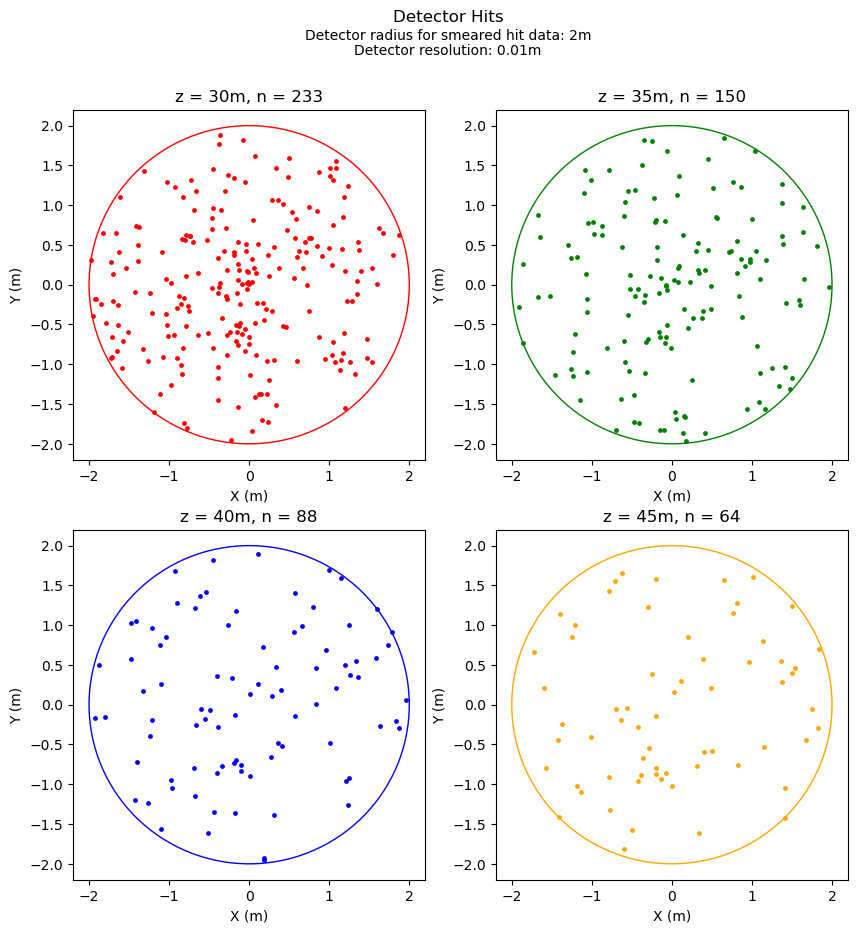

In [13]:
# Set the detector radius to 2
detector_radius = 2
smeared_hits= smear_hits(station_hit_filtered, 0.01)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Loop over each station and plot the the station hits
for i in range(len(smeared_hits)):
    x, y, z = zip(*smeared_hits[i])
    ax = axes[i // 2, i % 2]
    num_points = len(x)
    ax.scatter(x, y, s=6, c=colors[i])
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_title(f'z = {z_stn[i]}m, n = {num_points}')
    
    ax.set_xlim([-2.2, 2.2])
    ax.set_ylim([-2.2, 2.2])
    # Adding a circe corresponding to the detector - assumed to be a circular detector 
    circle = patches.Circle((0, 0), radius=detector_radius, linewidth=1, edgecolor=colors[i], facecolor='none')
    ax.add_patch(circle)

fig.suptitle('Detector Hits')

plt.figtext(0.5, 0.95, f'Detector radius for smeared hit data: {detector_radius}m', ha='center')
plt.figtext(0.5, 0.935, f'Detector resolution: {detector_res}m', ha='center')

plt.show()

In [14]:
import pandas as pd #importing library to handle dataframes
from tabulate import tabulate #importing library to plot a formatted table

detector_radius = 2
num_particles=3000
u_dtr = decay_direction(num_particles)
I = forward_dirn(u_dtr,num_particles)
v = beam_velocity(meanbeamVelocityZ, stdDevBeamVelocityZ, num_particles)
t = decay_time(tau,num_particles)
r_vtx = decay_vertex(v, t)[I]
propagation, station_hit = propagate_daughter(r_vtx, u_dtr[I], z_stn)
smeared_hits = smear_hits(station_hit, 0.01)
index = index_filter(station_hit, z_stn, r_vtx) #calling function to obtain indicies of detector hits

for idx in np.unique(index):
    data = []
    # Loop over the different stations for particle
    for i in range(station_hit.shape[0]):
        # Extract x, y, and z_hit coords
        x, y, z_hit = station_hit[i][idx]

        # condition to check for which particles collide with the detector
        if np.sqrt(x**2 + y**2) <= detector_radius and abs(z_hit - z_stn[i]) <= 0.1:
            station_hits = f"({x:.2f}, {y:.2f}, {z_hit:.2f})"
        else:
            station_hits = 'N/A'

        # Dictionary for particle data
        particle_data = {
            'Station': f"{i+1}",
            'Decay Vertex (x, y, z) (m)': f"({r_vtx[idx][0]:.2f}, {r_vtx[idx][1]:.2f}, {r_vtx[idx][2]:.2f})",
            'Velocity (x, y, z) (m/s)': f"({v[idx][0]:.2f}, {v[idx][1]:.2f}, {v[idx][2]:.2f})",
            'Station Hits (x, y, z) (m)': station_hits
        }

        # Add this particle's data to the main data list
        data.append(particle_data)

    # Create a DataFrame from the data list and print it using tabulate
    print(f"Particle {idx+1}")
    print(tabulate(data, headers='keys', floatfmt='.2f', showindex=False, tablefmt='psql'))
    print("\n" + "-"*40 + "\n")
    




Particle 155
+-----------+------------------------------+----------------------------+------------------------------+
|   Station | Decay Vertex (x, y, z) (m)   | Velocity (x, y, z) (m/s)   | Station Hits (x, y, z) (m)   |
|-----------+------------------------------+----------------------------+------------------------------|
|         1 | (0.00, 0.00, 26.56)          | (0.00, 0.00, 2051.63)      | (1.58, 0.60, 30.00)          |
|         2 | (0.00, 0.00, 26.56)          | (0.00, 0.00, 2051.63)      | N/A                          |
|         3 | (0.00, 0.00, 26.56)          | (0.00, 0.00, 2051.63)      | N/A                          |
|         4 | (0.00, 0.00, 26.56)          | (0.00, 0.00, 2051.63)      | N/A                          |
+-----------+------------------------------+----------------------------+------------------------------+

----------------------------------------

Particle 267
+-----------+------------------------------+----------------------------+------------------


This function first initializes an empty list to store the reconstructed decay vertices. It then iterates over each particle and calculates the line fits for the hits in each station. If there are at least two line fits, it calculates the intersection points between the lines from different stations and averages the intersection points to obtain the reconstructed decay vertex position. Finally, it appends the reconstructed vertex to the list and returns the reconstructed vertices as a numpy array.


## Part 6 - Summary

In the Markdown cell below, describe how your code solves the problem set. State any equations used in the solution and how they were obtained. Include your reasons for any libraries you used, as well as any particular programming techniques. Explain your choice of any test cases. Finally, state any salient features of the results you obtained. You are not expected to write more than about 400-500 words.

The exercise focuses on using numpy arrays and numpy functions for vector algebra to simulate and analyze the behavior of particles in a high-energy physics experiment.

The exercies utilised a number of Monte Carlo systems to generate random events representing the decay of the X particle into other particles. For each event, random initial positions, velocity, and decay times were assigned using a normal distribution based on their mean values. These random events were generated using numpy's random module, which provides functions for generating random numbers and probability distributions.

Trajectories of the decay products (daughter particles) through the tracking stations were found. Generating two angles, phi and theta, using random uniform distributions between 0 and 2π for phi, and a distribution proportional to sin(𝜃) for theta, which was obtained using the inverse cosine function of a random uniform distribution between -1 and 1. The directional vectors were then obtained by computing the sin and cosine of phi and theta and stacking them into a numpy array. Plots were used verify that the generated vectors followed the desired distribution. The first subplot is a scatter plot of the generated vectors in 3D space which can be viewed from two different angles. The second subplot is a histogram of the theta and phi angles, which should follow a sin and uniform distribution, respectively. The code also calculates the R-squared value for the sin distribution of theta, and the p-value for the uniform distribution of phi using the chi-squared test.

The propegtion of the daughter particles was then obtained using the decay direction and the following equations:
$$x(z) = m_x z + c_x$$
$$y(z) = m_y z + c_y$$

Where $m_x = \frac{dx}{dz}$ and $m_y = \frac{dy}{dz}$ are the gradients and $c_x$ and $c_y$ represent intercepts. Particles that were moving in a negative z direction were filtered out and subsequently particles that did not hit the detector which was a circle with a 2 meter radius were filtered out. This resulted in a fewer  of particles being detected as the detector distance increased. 

The resolution of the detectors was then accounted in calculations and the distribution of the smeared hits was plotted in a histogram to verify that the expected guassian distribution was obtained. Finally a table was plotted to summarise the results showing the hits for each station for each particle. The simulation was done in the lab frame as its direction is equivalent to the direction in the beam particle rest frame. This is a valid approximation, provided the daughter particle has much higher momentum than the beam particle.
